In [2]:
import tensorflow
import spacy
import keras
import numpy as np 
import pandas as pd 
import os
spacy.load('en_core_web_sm')


In [4]:
#for dirname, _, filenames in os.walk('C:/Users/User/Downloads'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))


In [5]:
raw = pd.read_csv('news_summary.csv', encoding='iso-8859-1')

In [6]:
import pandas as pd

df = pd.read_csv('C:/Users/User/Downloads/news_summary.csv', encoding='iso-8859-1')
row_count = len(df)

print(f'The DataFrame has {row_count} rows.')

The DataFrame has 4514 rows.


In [7]:
pre1 =  raw.iloc[:4514,[4,5]].copy()

In [8]:
pre = pd.DataFrame(pre1)

In [9]:
pre.head(6)

,text,ctext
0,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...
5,A 32-year-old man on Wednesday was found hangi...,An alleged suspect in a kidnapping case was fo...


In [10]:
print(pre.head(2))

                                                text  \
0  The Administration of Union Territory Daman an...   
1  Malaika Arora slammed an Instagram user who tr...   

                                               ctext  
0  The Daman and Diu administration on Wednesday ...  
1  From her special numbers to TV?appearances, Bo...  


In [12]:
print(pre['ctext'][0])

The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,? the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ? one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ? were issued by the Daman

In [13]:
print(pre['text'][0])

The Administration of Union Territory Daman and Diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of Rakshabandhan on August 7. The administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media.


# Data Cleansing

In [14]:
import re

#Removes non-alphabetic characters:
def text_strip(column):
    for row in column:
        
        #ORDER OF REGEX IS VERY VERY IMPORTANT!!!!!!
        
        row=re.sub(r"(\\t)", ' ', str(row)).lower() #remove escape charecters
        row=re.sub(r"(\\r)", ' ', str(row)).lower() 
        row=re.sub(r"(\\n)", ' ', str(row)).lower()
        
        row=re.sub(r"(__+)", ' ', str(row)).lower()   #remove _ if it occors more than one time consecutively
        row=re.sub(r"(--+)", ' ', str(row)).lower()   #remove - if it occors more than one time consecutively
        row=re.sub(r"(~~+)", ' ', str(row)).lower()   #remove ~ if it occors more than one time consecutively
        row=re.sub(r"(\+\++)", ' ', str(row)).lower()   #remove + if it occors more than one time consecutively
        row=re.sub(r"(\.\.+)", ' ', str(row)).lower()   #remove . if it occors more than one time consecutively
        
        row=re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower() #remove <>()|&©ø"',;?~*!
        
        row=re.sub(r"(mailto:)", ' ', str(row)).lower() #remove mailto:
        row=re.sub(r"(\\x9\d)", ' ', str(row)).lower() #remove \x9* in text
        row=re.sub(r"([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower() #replace INC nums to INC_NUM
        row=re.sub(r"([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower() #replace CM# and CHG# to CM_NUM
        
        
        row=re.sub(r"(\.\s+)", ' ', str(row)).lower() #remove full stop at end of words(not between)
        row=re.sub(r"(\-\s+)", ' ', str(row)).lower() #remove - at end of words(not between)
        row=re.sub(r"(\:\s+)", ' ', str(row)).lower() #remove : at end of words(not between)
        
        row=re.sub(r"(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        
        #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass #there might be emails with no url in them
        

        
        row = re.sub(r"(\s+)",' ',str(row)).lower() #remove multiple spaces
        
        #Should always be last
        row=re.sub(r"(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces

        
        
        yield row


In [16]:
brief_cleaning1 = list(text_strip(pre['ctext']))
brief_cleaning2 = list(text_strip(pre['text']))

In [17]:
print(brief_cleaning1[0])

the daman and diu administration on wednesday withdrew circular that asked women staff to tie rakhis on male colleagues after the order triggered backlash from employees and was ripped apart on social media.the union territory administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate rakshabandhan at workplace it has been decided to celebrate the festival of rakshabandhan on august in this connection all offices/ departments shall remain open and celebrate the festival collectively at suitable time wherein all the lady staff shall tie rakhis to their colleagues the order issued on august by gurpreet singh deputy secretary personnel had said.to ensure that no one skipped office an attendance report was to be sent to the government the next evening.the two notifications one mandating the celebration of rakshabandhan left and the other withdrawing the mandate right were issued by the daman and diu administration day apa

In [18]:
print(brief_cleaning2[0])

the administration of union territory daman and diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of rakshabandhan on august the administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media.


In [22]:
import spacy
from time import time

t = time()

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) 

# Process texts
text = [str(doc) for doc in nlp.pipe(brief_cleaning1, batch_size=3000, n_process=-1)]

print('Processing time: {} mins'.format(round((time() - t) / 60, 2)))

Processing time: 3.96 mins


In [23]:
#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:


t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(brief_cleaning2, batch_size=5000,n_process=-1)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))


Time to clean up everything: 0.68 mins


In [24]:
text[0]

'the daman and diu administration on wednesday withdrew circular that asked women staff to tie rakhis on male colleagues after the order triggered backlash from employees and was ripped apart on social media.the union territory administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate rakshabandhan at workplace it has been decided to celebrate the festival of rakshabandhan on august in this connection all offices/ departments shall remain open and celebrate the festival collectively at suitable time wherein all the lady staff shall tie rakhis to their colleagues the order issued on august by gurpreet singh deputy secretary personnel had said.to ensure that no one skipped office an attendance report was to be sent to the government the next evening.the two notifications one mandating the celebration of rakshabandhan left and the other withdrawing the mandate right were issued by the daman and diu administration day ap

In [25]:
summary[0]

'_START_ the administration of union territory daman and diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of rakshabandhan on august the administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media. _END_'

In [26]:
pre['cleaned_text'] = pd.Series(text)
pre['cleaned_summary'] = pd.Series(summary)

In [27]:
text_count = []
summary_count = []

In [28]:
for sent in pre['cleaned_text']:
    text_count.append(len(sent.split()))
for sent in pre['cleaned_summary']:
    summary_count.append(len(sent.split()))

In [57]:
print(text_count[0])
print(summary_count[0])

353
61


In [58]:
graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count

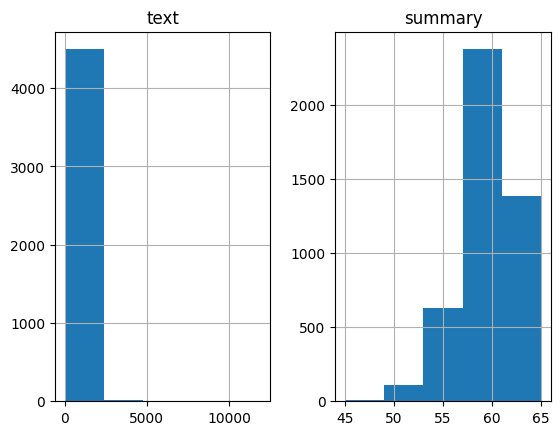

In [59]:
import matplotlib.pyplot as plt

graph_df.hist(bins = 5)
plt.show()

In [62]:
#Check how much % of summary have 0-15 words
cnt=0
for i in pre['cleaned_summary']:
    if(len(i.split())<=65):
        cnt=cnt+1
print(cnt/len(pre['cleaned_summary']))

1.0


In [63]:
#Check how much % of text have 0-70 words
cnt=0
for i in pre['cleaned_text']:
    if(len(i.split())<=500):
        cnt=cnt+1
print(cnt/len(pre['cleaned_text']))

0.8630926007975188


In [64]:
#Model to summarize the text between 0-15 words for Summary and 0-100 words for Text
max_text_len=500
max_summary_len=65

In [65]:
#Select the Summaries and Text between max len defined above

cleaned_text =np.array(pre['cleaned_text'])
cleaned_summary=np.array(pre['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre=pd.DataFrame({'text':short_text,'summary':short_summary})

In [66]:
count_nan = 0

for i in range(len(post_pre)):
    if post_pre['text'][i] == 'nan':
        count_nan += 1

print(count_nan)

118


In [67]:
post_pre.head(10)

,text,summary
0,the daman and diu administration on wednesday ...,_START_ the administration of union territory ...
1,from her special numbers to tv appearances bol...,_START_ malaika arora slammed an instagram use...
2,the indira gandhi institute of medical science...,_START_ the indira gandhi institute of medical...
3,lashkar-e-taiba kashmir commander abu dujana w...,_START_ lashkar-e-taiba kashmir commander abu ...
4,an alleged suspect in kidnapping case was foun...,_START_ a 32-year-old man on wednesday was fou...
5,in an interesting ruling the delhi high court ...,_START_ the delhi high court reduced the compe...
6,two years after helicopter crash near the bomb...,_START_ an inquiry by the aircraft accident in...
7,it sounds like satire but make no mistake at t...,_START_ the congress party has opened bank cal...
8,the food safety and standards authority of ind...,_START_ india food regulator food safety and s...
9,bharti sharma mother of the 16-year-old boy wh...,_START_ the mother of harshit sharma the class...


In [68]:
print(post_pre['text'][0])

the daman and diu administration on wednesday withdrew circular that asked women staff to tie rakhis on male colleagues after the order triggered backlash from employees and was ripped apart on social media.the union territory administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate rakshabandhan at workplace it has been decided to celebrate the festival of rakshabandhan on august in this connection all offices/ departments shall remain open and celebrate the festival collectively at suitable time wherein all the lady staff shall tie rakhis to their colleagues the order issued on august by gurpreet singh deputy secretary personnel had said.to ensure that no one skipped office an attendance report was to be sent to the government the next evening.the two notifications one mandating the celebration of rakshabandhan left and the other withdrawing the mandate right were issued by the daman and diu administration day apa

In [69]:
#Add sostok and eostok at 
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'sostok '+ x + ' eostok')


In [70]:
post_pre.head(2)

,text,summary
0,the daman and diu administration on wednesday ...,sostok _START_ the administration of union ter...
1,from her special numbers to tv appearances bol...,sostok _START_ malaika arora slammed an instag...


MODEL BUILDING

In [71]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(post_pre['text']),np.array(post_pre['summary']),test_size=0.1,random_state=0,shuffle=True)

In [72]:
jumlah=0
for i in range(len(x_tr)):
    jumlah+=1
print(jumlah)

3506


In [73]:
print(x_val[1])

farzaneh shrafbafi professor of aeronautical engineering at amir kabir university of technology and shahid sattari university of aeronautical engineering and the first iranian woman to get ph.d in aerospace was selected from among the board members of iran air.farzaneh shrafbafi aeronautical engineering professor will become first female ceo of #iran oldest airline @iranair_iri pic.twitter.com/rnw7tknmlmin an interview given to an iranian daily back in 2014 farzaneh told the newspaper that she was always keen student of science her father who was physics professor at sharif university helped shape her interest in the field 


In [74]:
for i in range(2):
    print(x_tr[i])
    print('\n')
    print(y_tr[i])
    print('\n')

more than 200 sheep have plunged to their deaths in the pyrenees while apparently trying to escape brown bear the bears have been reintroduced to the mountain region over the past three decades after being wiped out by hunters.the sheep which belonged to farmer in couflens south-west france are thought to have taken fright when the bear appeared in the area last sunday.after the predator attacked one of the sheep 209 others in the flock panicked and hurled themselves off 200 metre-high cliff on the border between france and spain the bodies of 169 sheep were found the next day at the foot of the cliff in the spanish village of lladorre the other dead animals were found in france.the spanish news agency europa press said bear fur had been found on one of the dead sheep and would be analysed to try to establish exactly what had happened.although the french government will compensate the farmer for his loss the incident has provoked an angry response from the local branch of the french fa

In [75]:
for i in range(2):
    print(x_val[i])
    print('\n')
    print(y_val[i])
    print('\n')

doctors in the uk have found 27 contact lenses stuck in 67-year-old woman eye while they were preparing her for cataract surgery.the lenses which resembled blueish mass in the patient eye were causing her discomfort that she simply attributed to dry eye and old age.the case happened in november last year but has just been reported in the british medical journal according to metro.co.uk none of us have ever seen this before it was such large mass all the 17 contact lenses were stuck together we were really surprised that the patient did not notice it because it would cause quite lot of irritation while it was sitting there rupal morjaria specialist trainee ophthalmologist who dealt with the case at solihull hospital near birmingham said.initially eye specialists discovered 17 lenses before further examination disclosed that another 10 lenses were stuck in the eye.the patient said she had been wearing monthly disposable contact lenses for 35 years but did not attend regular appointments.

In [76]:
#jumlah=0
#for i in range(len(x_val)):
#    jumlah+=1
#print(jumlah)

In [77]:
#Lets tokenize the text to get the vocab count , you can use Spacy here also

from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [78]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 62.852604340139884
Total Coverage of rare words: 4.062663326544957


In [79]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 14500


In [80]:
#x_tokenizer.word_index

In [81]:

reverse_source_word_index=x_tokenizer.index_word

x_tr_text    =   x_tokenizer.sequences_to_texts(x_tr) 
x_val_text   =   x_tokenizer.sequences_to_texts(x_val)

print(x_tr_text[0])
print('\n')
print(x_val_text[0])

more than 200 sheep have to their deaths in the while apparently trying to escape brown bear the bears have been to the mountain region over the past three decades after being out by hunters the sheep which belonged to farmer in south west france are thought to have taken when the bear appeared in the area last sunday after the attacked one of the sheep others in the flock panicked and hurled themselves off 200 metre high on the border between france and spain the bodies of 169 sheep were found the next day at the foot of the in the spanish village of the other dead animals were found in france the spanish news agency press said bear fur had been found on one of the dead sheep and would be analysed to try to establish exactly what had happened although the french government will compensate the farmer for his loss the incident has provoked an angry response from the local branch of the french farmers federation which biodiversity and keeps the mountains alive is not compatible with the 

In [82]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [83]:
#y_tokenizer.word_index

In [84]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 76.38517830177722
Total Coverage of rare words: 11.296879764203679


In [85]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 4067


In [86]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

y_tr_text    =   y_tokenizer.sequences_to_texts(y_tr) 
y_val_text   =   y_tokenizer.sequences_to_texts(y_val)

print(y_tr_text[0])
print('\n')
print(y_val_text[0])

sostok start over 200 to their deaths from 200 metre high on the france spain border while reportedly trying to escape brown bear the bodies of were found in village while the rest were found in france the of belonging to french farmer had after the bear attacked one of them end eostok


sostok start uk doctors have found 27 contact stuck together in year old woman eye while they were her for surgery the mass was causing her that she attributed to eye and old age doctors said the patient said she had been wearing contact for 35 years but did not attend end eostok


In [87]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [88]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [89]:
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary from the w2v model = {}".format(x_voc))

K.clear_session()

latent_dim = 200
embedding_dim=150
#def encoder_input(iinput):
#    untukinput = Input(shape=(iinput,))
#    return untukinput

# Encoder
encoder_inputs=Input(shape=(max_text_len,)) 


#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1,state_h1,state_c1= encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2,state_h2,state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs,state_h,state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_states,decoder_back_state= decoder_lstm(dec_emb,initial_state=[state_h,state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

#temperature layer
temp = keras.layers.Lambda(lambda x: x / temp)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()


Size of vocabulary from the w2v model = 14500

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 500)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 500, 150)             2175000   ['input_1[0][0]']             
                                                                                                  
 lstm (LSTM)                 [(None, 500, 200),           280800    ['embedding[0][0]']           
                              (None, 200),                                                        
                              (None, 200)]                                                        
                                               

In [90]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [93]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [94]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=3,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))
 

Epoch 1/3
28/28 [==============================] - 2584s 93s/step - loss: 5.8430 - val_loss: 5.7290
Epoch 2/3
28/28 [==============================] - 4350s 157s/step - loss: 5.6914 - val_loss: 5.5657
Epoch 3/3
28/28 [==============================] - 9543s 349s/step - loss: 5.5670 - val_loss: 5.3443


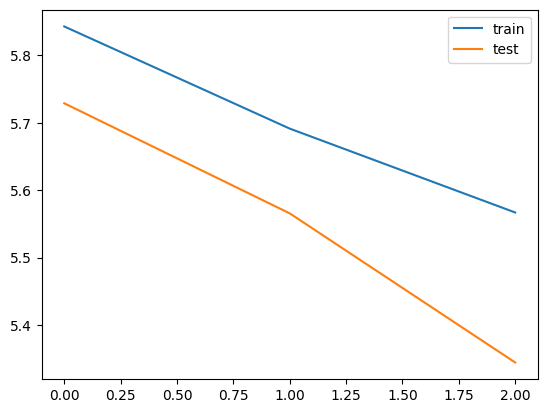

In [95]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [96]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

x_tr_text    =   x_tokenizer.sequences_to_texts(x_tr) 
x_val_text   =   x_tokenizer.sequences_to_texts(x_val)

In [97]:
x_tr_text[0]

'more than 200 sheep have to their deaths in the while apparently trying to escape brown bear the bears have been to the mountain region over the past three decades after being out by hunters the sheep which belonged to farmer in south west france are thought to have taken when the bear appeared in the area last sunday after the attacked one of the sheep others in the flock panicked and hurled themselves off 200 metre high on the border between france and spain the bodies of 169 sheep were found the next day at the foot of the in the spanish village of the other dead animals were found in france the spanish news agency press said bear fur had been found on one of the dead sheep and would be analysed to try to establish exactly what had happened although the french government will compensate the farmer for his loss the incident has provoked an angry response from the local branch of the french farmers federation which biodiversity and keeps the mountains alive is not compatible with the

In [98]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h,decoder_state_input_c],
    [decoder_outputs2]+[state_h2,state_c2])

In [99]:
#encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])
#encoder_model.predict(x_tr_seq[0])

In [100]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']
    print(target_seq[0,0])

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
 

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        print('sample index = ',sampled_token_index)
        #
        #sampled_token = reverse_target_word_index[sampled_token_index]
        #print(sampled_token)
        #if(sampled_token!='eostok'):
        #    decoded_sentence += ' '+sampled_token
        #    # Exit condition: either hit max length or find stop word.
        #if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
        #    stop_condition = True
    #
        try:
            sampled_token = reverse_target_word_index[sampled_token_index]
            print('sample token=',sampled_token)
            if(sampled_token!='eostok'):
                decoded_sentence += ' '+sampled_token
            # Exit condition: either hit max length or find stop word.
            
            if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
                stop_condition = True
        except KeyError:
            print("Key not found")
            break
        print('decoded =',decoded_sentence)
        
#try:
#    print(my_dict[key])
#except KeyError:
#    print("Key not found")
    

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [105]:
print(x_tr[0])
print(x_tr_text[0])
print(np.shape(x_tr[40]))

[   69   117  1054  7770    21     2    40  2008     4     1    74  1467
   567     2  3420  3174  3335     1  9024    21    31     2     1  6066
   693    60     1   384    99  2113    32    80    55    16  9025     1
  7770    39  3760     2  2372     4   305   466  1944    26   896     2
    21   170    50     1  3335  1595     4     1   258    77   453    32
     1   970    48     3     1  7770   410     4     1 11022 11023     5
  5027  1290   150  1054  4635   149     6     1   500   166  1944     5
  3642     1  1120     3 11024  7770    33   172     1   198    95    18
     1  2227     3     1     4     1  6813   458     3     1    83   720
  1396    33   172     4  1944     1  6813   321   521   732    10  3335
 12446    27    31   172     6    48     3     1   720  7770     5    61
    20  7771     2  1354     2  4026  3175   104    27   661  1415     1
  2228    43    23  6067     1  2372     7    22   924     1   169    15
 11025    28  2114   733    19     1   399  1663   

In [104]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [163]:
for i in range(0,5):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print('shape dari i:',np.shape(x_tr[i]))
    print('type=',type(x_tr[i])),
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: the police has banned in groups in leone citing public order and safety the police accused people in groups of insults traffic on vehicles playing music and property from other members of the public it said violators will be with according to law you have been warned 
Original summary: start bans in groups end 
shape dari i: (100,)
type= <class 'numpy.ndarray'>
1/1 [==============================] - 0s 476ms/step
3.0
1/1 [==============================] - 0s 29ms/step
sample index =  2
sample token= start
decoded =  start
1/1 [==============================] - 0s 30ms/step
sample index =  11
sample token= delhi
decoded =  start delhi
1/1 [==============================] - 0s 28ms/step
sample index =  5
sample token= to
decoded =  start delhi to
1/1 [==============================] - 0s 34ms/step
sample index =  5
sample token= to
decoded =  start delhi to to
1/1 [==============================] - 0s 27ms/step
sample index =  5
sample token= to
decoded =  start delhi to to to
1/